In [50]:
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import geopandas as gpd
from shapely.geometry import box
import numpy as np

In [51]:
#mysore
G = ox.graph_from_place("Mysuru, Karnataka, India", network_type="drive")


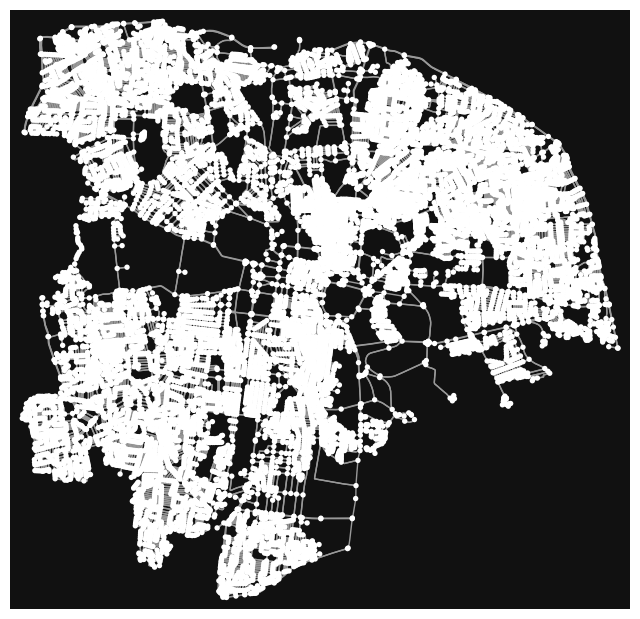

In [52]:
#map
fig, ax = ox.plot_graph(G)
plt.show()

In [53]:
#hospitaals
hospitals = ox.features_from_place(
    "Mysuru, Karnataka, India",
    tags={"amenity": "hospital"}
)

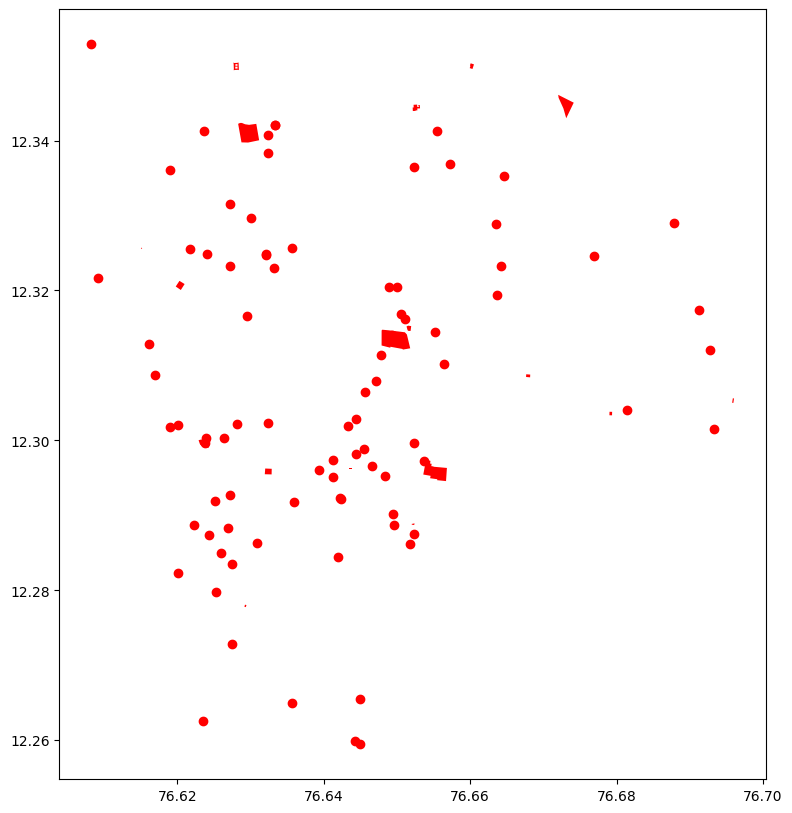

In [54]:
hospitals.plot(figsize=(10,10), color='red')
plt.show()

In [55]:
hospitals

geometry  \
element id                                                              
node    465192842                           POINT (76.63239 12.33832)   
        465196073                           POINT (76.62718 12.33155)   
        542383450                            POINT (76.64234 12.2922)   
        1221006184                          POINT (76.64496 12.26551)   
        1636785470                          POINT (76.64129 12.29514)   
...                                                               ...   
way     475505915   POLYGON ((76.62946 12.27802, 76.62926 12.27808...   
        498147947   POLYGON ((76.67903 12.30382, 76.67902 12.30335...   
        525517808   POLYGON ((76.62982 12.3421, 76.6308 12.34223, ...   
        741179471   POLYGON ((76.66007 12.35031, 76.66052 12.35016...   
        1428214845  POLYGON ((76.66334 12.32891, 76.66319 12.3288,...   

                     amenity emergency                                name  \
element id                                                                   
node    465192842   hospital       yes                        ESI Hospital   
        465196073   hospital       NaN           Adithya Adhikari Hospital   
        542383450   hospital       NaN                       Ashoka Clinic   
        1221006184  hospital       NaN                 Bone & Joint Clinic   
        1636785470  hospital        no                  Clumax Diagnostics   
...                      ...       ...                                 ...   
way     475505915   hospital       NaN                Arvinda Nursing Home   
        498147947   hospital       NaN                    MRC Eye Hospital   
        525517808   hospital       NaN                    P. K. Sanitorium   
        741179471   hospital       NaN                    Manipal Hospital   
        1428214845  hospital       NaN  Srinivasa Multispeciality Hospital   

                                 name:kn addr:district  \
element id                                               
node    465192842         ಇಎಸ್ಐ ಆಸ್ಪತ್ರೆ           NaN   
        465196073        ಆದಿತ್ಯ ಆಸ್ಪತ್ರೆ        Mysuru   
        542383450                    NaN           NaN   
        1221006184                   NaN           NaN   
        1636785470                   NaN           NaN   
...                                  ...           ...   
way     475505915   ಅರವಿಂದ ನರ್ಸಿಂಗ್ ಹೋಮ್        Mysuru   
        498147947                    NaN           NaN   
        525517808                    NaN           NaN   
        741179471        ಮಣಿಪಾಲ ಆಸ್ಪತ್ರೆ        Mysuru   
        1428214845                   NaN           NaN   

                                                            addr:full  \
element id                                                              
node    465192842                                                 NaN   
        465196073   417 Contour Road, Gokulam Ii Nd Stag Near Vija...   
        542383450                                                 NaN   
        1221006184                                                NaN   
        1636785470                                                NaN   
...                                                               ...   
way     475505915                     No. 644, 4Th Main, Arvind Nagar   
        498147947                                                 NaN   
        525517808                                                 NaN   
        741179471                 Siddique Nagar, Bannimantap, Mysuru   
        1428214845                                                NaN   

                   addr:postcode addr:state healthcare  ... website alt_name  \
element id                                              ...                    
node    465192842            NaN        NaN        NaN  ...     NaN      NaN   
        465196073         570002  Karnataka   hospital  ...     NaN      NaN   
        542383450            NaN        NaN        NaN  ...     NaN    

In [56]:
hospitals.columns

Index(['geometry', 'amenity', 'emergency', 'name', 'name:kn', 'addr:district',
       'addr:full', 'addr:postcode', 'addr:state', 'healthcare', 'source',
       'designation', 'addr:city', 'addr:housenumber', 'addr:street',
       'name:en', 'operator', 'operator:short', 'operator:wikidata',
       'description', 'ele', 'email', 'healthcare:speciality', 'operator:type',
       'website', 'alt_name', 'building', 'name:etymology:wikidata',
       'wikidata', 'wikimedia_commons', 'wikipedia', 'phone', 'type',
       'name:tr'],
      dtype='object')

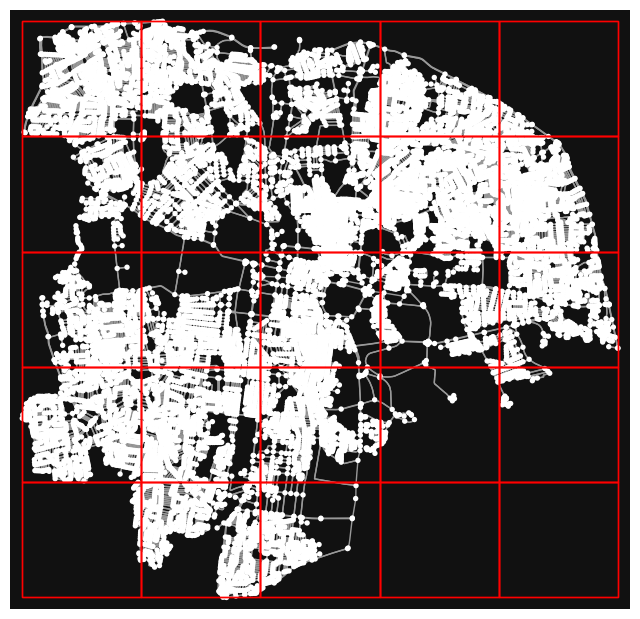

In [57]:
nodes_gdf, edges_gdf = ox.graph_to_gdfs(G)
bounds = edges_gdf.total_bounds            
minx, miny, maxx, maxy = bounds
nx = 5
ny = 5
x_step = (maxx - minx) / nx
y_step = (maxy - miny) / ny
zones = []
zone_polys = []

for i in range(nx):
    for j in range(ny):
        zminx = minx + i * x_step
        zminy = miny + j * y_step
        zmaxx = minx + (i + 1) * x_step
        zmaxy = miny + (j + 1) * y_step
        zone = (zminx, zminy, zmaxx, zmaxy)
        zones.append(zone)
        zone_polys.append(box(zminx, zminy, zmaxx, zmaxy))

zones_gdf = gpd.GeoDataFrame({
    'zone_id': range(len(zone_polys)),
    'i': [int(idx // ny) for idx in range(len(zone_polys))],
    'j': [int(idx % ny) for idx in range(len(zone_polys))],
    'geometry': zone_polys
}, crs=nodes_gdf.crs)

zone_gdfs = []
for idx, geom in enumerate(zone_polys):
    gdf = gpd.GeoDataFrame({'zone_id':[idx], 'geometry':[geom]}, crs=nodes_gdf.crs)
    zone_gdfs.append(gdf)

fig, ax = ox.plot_graph(G, show=False, close=False)
if isinstance(ax, (list, tuple, np.ndarray)):
    ax = ax[0]

for zone in zones:
    zminx, zminy, zmaxx, zmaxy = zone
    rect = Rectangle((zminx, zminy), zmaxx - zminx, zmaxy - zminy,
                     fill=False, edgecolor='red', linewidth=1, zorder=3)
    ax.add_patch(rect)

zones_gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1, zorder=4)

plt.show()


In [58]:
print('zones_gdf shape:', zones_gdf.shape)
print('zones_gdf columns:', list(zones_gdf.columns))
print('hospitals shape (before):', hospitals.shape)
print('hospitals columns:', list(hospitals.columns))

if hospitals.crs != zones_gdf.crs:
    hospitals = hospitals.to_crs(zones_gdf.crs)

joined = gpd.sjoin(hospitals, zones_gdf[['zone_id','geometry']], how='left', predicate='within')

for idx, zrow in zones_gdf.iterrows():
    zid = zrow['zone_id']
    zone_hosp = joined[joined['zone_id'] == zid] if 'zone_id' in joined.columns else joined[[]]
    print(f"Zone {zid} (i={zrow.get('i')}, j={zrow.get('j')}): {len(zone_hosp)} hospitals; hospitals shape: {zone_hosp.shape}")
    if len(zone_hosp) > 0:
        cols = [c for c in ['name','geometry'] if c in zone_hosp.columns]
        print(zone_hosp[cols].head())

empty_zones = [int(zrow['zone_id']) for _, zrow in zones_gdf.iterrows() if len(joined[joined['zone_id'] == zrow['zone_id']]) == 0]
print('Zones with no hospitals:', empty_zones)

zones_gdf shape: (25, 4)
zones_gdf columns: ['zone_id', 'i', 'j', 'geometry']
hospitals shape (before): (105, 34)
hospitals columns: ['geometry', 'amenity', 'emergency', 'name', 'name:kn', 'addr:district', 'addr:full', 'addr:postcode', 'addr:state', 'healthcare', 'source', 'designation', 'addr:city', 'addr:housenumber', 'addr:street', 'name:en', 'operator', 'operator:short', 'operator:wikidata', 'description', 'ele', 'email', 'healthcare:speciality', 'operator:type', 'website', 'alt_name', 'building', 'name:etymology:wikidata', 'wikidata', 'wikimedia_commons', 'wikipedia', 'phone', 'type', 'name:tr']
Zone 0 (i=0, j=0): 0 hospitals; hospitals shape: (0, 36)
Zone 1 (i=0, j=1): 0 hospitals; hospitals shape: (0, 36)
Zone 2 (i=0, j=2): 3 hospitals; hospitals shape: (3, 36)
                                                                 name  \
element id                                                              
node    7202979471  All India Institute of Speech and Hearing, Mysore   
  

In [59]:
joined

geometry  \
element id                                                              
node    465192842                           POINT (76.63239 12.33832)   
        465196073                           POINT (76.62718 12.33155)   
        542383450                            POINT (76.64234 12.2922)   
        1221006184                          POINT (76.64496 12.26551)   
        1636785470                          POINT (76.64129 12.29514)   
...                                                               ...   
way     475505915   POLYGON ((76.62946 12.27802, 76.62926 12.27808...   
        498147947   POLYGON ((76.67903 12.30382, 76.67902 12.30335...   
        525517808   POLYGON ((76.62982 12.3421, 76.6308 12.34223, ...   
        741179471   POLYGON ((76.66007 12.35031, 76.66052 12.35016...   
        1428214845  POLYGON ((76.66334 12.32891, 76.66319 12.3288,...   

                     amenity emergency                                name  \
element id                                                                   
node    465192842   hospital       yes                        ESI Hospital   
        465196073   hospital       NaN           Adithya Adhikari Hospital   
        542383450   hospital       NaN                       Ashoka Clinic   
        1221006184  hospital       NaN                 Bone & Joint Clinic   
        1636785470  hospital        no                  Clumax Diagnostics   
...                      ...       ...                                 ...   
way     475505915   hospital       NaN                Arvinda Nursing Home   
        498147947   hospital       NaN                    MRC Eye Hospital   
        525517808   hospital       NaN                    P. K. Sanitorium   
        741179471   hospital       NaN                    Manipal Hospital   
        1428214845  hospital       NaN  Srinivasa Multispeciality Hospital   

                                 name:kn addr:district  \
element id                                               
node    465192842         ಇಎಸ್ಐ ಆಸ್ಪತ್ರೆ           NaN   
        465196073        ಆದಿತ್ಯ ಆಸ್ಪತ್ರೆ        Mysuru   
        542383450                    NaN           NaN   
        1221006184                   NaN           NaN   
        1636785470                   NaN           NaN   
...                                  ...           ...   
way     475505915   ಅರವಿಂದ ನರ್ಸಿಂಗ್ ಹೋಮ್        Mysuru   
        498147947                    NaN           NaN   
        525517808                    NaN           NaN   
        741179471        ಮಣಿಪಾಲ ಆಸ್ಪತ್ರೆ        Mysuru   
        1428214845                   NaN           NaN   

                                                            addr:full  \
element id                                                              
node    465192842                                                 NaN   
        465196073   417 Contour Road, Gokulam Ii Nd Stag Near Vija...   
        542383450                                                 NaN   
        1221006184                                                NaN   
        1636785470                                                NaN   
...                                                               ...   
way     475505915                     No. 644, 4Th Main, Arvind Nagar   
        498147947                                                 NaN   
        525517808                                                 NaN   
        741179471                 Siddique Nagar, Bannimantap, Mysuru   
        1428214845                                                NaN   

                   addr:postcode addr:state healthcare  ... building  \
element id                                              ...            
node    465192842            NaN        NaN        NaN  ...      NaN   
        465196073         570002  Karnataka   hospital  ...      NaN   
        542383450            NaN        NaN        NaN  ...      NaN   
        1221006184           Na

In [60]:
hosp0 = joined[joined['zone_id'] == 0]
hosp0

,,geometry,amenity,emergency,name,name:kn,addr:district,addr:full,addr:postcode,addr:state,healthcare,...,building,name:etymology:wikidata,wikidata,wikimedia_commons,wikipedia,phone,type,name:tr,index_right,zone_id
element,id,,,,,,,,,,,,,,,,,,,,,


In [61]:
zones_gdf['centroid'] = zones_gdf.centroid
zones_gdf[['zone_id', 'centroid']]
zones_gdf

C:\Users\deepa\AppData\Local\Temp\ipykernel_5796\1517525157.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zones_gdf['centroid'] = zones_gdf.centroid


,zone_id,i,j,geometry,centroid
0,0,0,0,"POLYGON ((76.61977 12.25341, 76.61977 12.27361...",POINT (76.60908 12.26351)
1,1,0,1,"POLYGON ((76.61977 12.27361, 76.61977 12.29381...",POINT (76.60908 12.28371)
2,2,0,2,"POLYGON ((76.61977 12.29381, 76.61977 12.31402...",POINT (76.60908 12.30391)
3,3,0,3,"POLYGON ((76.61977 12.31402, 76.61977 12.33422...",POINT (76.60908 12.32412)
4,4,0,4,"POLYGON ((76.61977 12.33422, 76.61977 12.35442...",POINT (76.60908 12.34432)
5,5,1,0,"POLYGON ((76.64116 12.25341, 76.64116 12.27361...",POINT (76.63047 12.26351)
6,6,1,1,"POLYGON ((76.64116 12.27361, 76.64116 12.29381...",POINT (76.63047 12.28371)
7,7,1,2,"POLYGON ((76.64116 12.29381, 76.64116 12.31402...",POINT (76.63047 12.30391)
8,8,1,3,"POLYGON ((76.64116 12.31402, 76.64116 12.33422...",POINT (76.63047 12.32412)
9,9,1,4,"POLYGON ((76.64116 12.33422, 76.64116 12.35442...",POINT (76.63047 12.34432)


In [62]:
mysore_boundary = ox.geocode_to_gdf("Mysuru, Karnataka, India")
outside_zones = zones_gdf[~zones_gdf.centroid.within(mysore_boundary.unary_union)]
outside_zones

C:\Users\deepa\AppData\Local\Temp\ipykernel_5796\793859249.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  outside_zones = zones_gdf[~zones_gdf.centroid.within(mysore_boundary.unary_union)]
C:\Users\deepa\AppData\Local\Temp\ipykernel_5796\793859249.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  outside_zones = zones_gdf[~zones_gdf.centroid.within(mysore_boundary.unary_union)]


,zone_id,i,j,geometry,centroid
0,0,0,0,"POLYGON ((76.61977 12.25341, 76.61977 12.27361...",POINT (76.60908 12.26351)
3,3,0,3,"POLYGON ((76.61977 12.31402, 76.61977 12.33422...",POINT (76.60908 12.32412)
5,5,1,0,"POLYGON ((76.64116 12.25341, 76.64116 12.27361...",POINT (76.63047 12.26351)
15,15,3,0,"POLYGON ((76.68393 12.25341, 76.68393 12.27361...",POINT (76.67324 12.26351)
16,16,3,1,"POLYGON ((76.68393 12.27361, 76.68393 12.29381...",POINT (76.67324 12.28371)
20,20,4,0,"POLYGON ((76.70532 12.25341, 76.70532 12.27361...",POINT (76.69462 12.26351)
21,21,4,1,"POLYGON ((76.70532 12.27361, 76.70532 12.29381...",POINT (76.69462 12.28371)
24,24,4,4,"POLYGON ((76.70532 12.33422, 76.70532 12.35442...",POINT (76.69462 12.34432)


In [ ]:
#remove zone 20 and 15
zones_gdf = zones_gdf[~zones_gdf['zone_id'].isin([15,20])]
zones_gdf.reset_index(drop=True, inplace=True)
zones_gdf.shape

(23, 5)

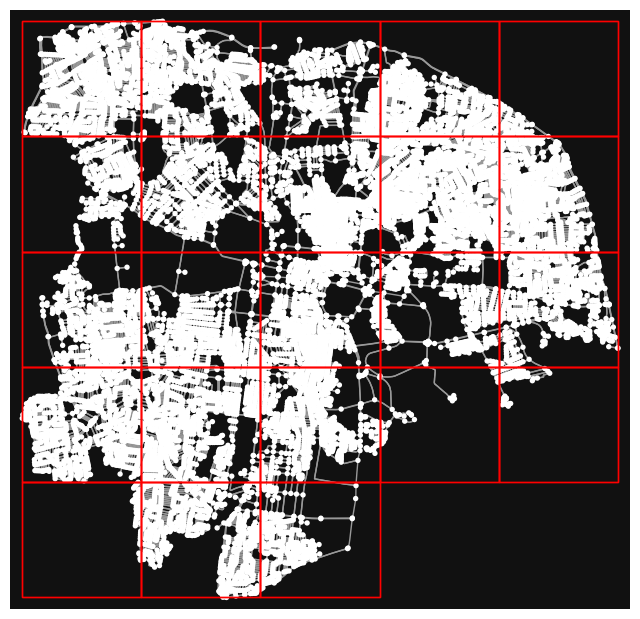

In [ ]:
#plot the map with the zones excluding 20 and 15
fig, ax = ox.plot_graph(G, show=False, close=False)
if isinstance(ax, (list, tuple, np.ndarray)):
    ax = ax[0]
for zone in zones_gdf['geometry']:
    zminx, zminy, zmaxx, zmaxy = zone.bounds
    rect = Rectangle((zminx, zminy), zmaxx - zminx, zmaxy - zminy,
                     fill=False, edgecolor='red', linewidth=1, zorder=3)
    ax.add_patch(rect)
zones_gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1, zorder=4)
plt.show()

In [65]:
#from the joined gdf, remove hospitals in zones 15 and 20
joined = joined[~joined['zone_id'].isin([15,20])]
joined

geometry  \
element id                                                              
node    465192842                           POINT (76.63239 12.33832)   
        465196073                           POINT (76.62718 12.33155)   
        542383450                            POINT (76.64234 12.2922)   
        1221006184                          POINT (76.64496 12.26551)   
        1636785470                          POINT (76.64129 12.29514)   
...                                                               ...   
way     475505915   POLYGON ((76.62946 12.27802, 76.62926 12.27808...   
        498147947   POLYGON ((76.67903 12.30382, 76.67902 12.30335...   
        525517808   POLYGON ((76.62982 12.3421, 76.6308 12.34223, ...   
        741179471   POLYGON ((76.66007 12.35031, 76.66052 12.35016...   
        1428214845  POLYGON ((76.66334 12.32891, 76.66319 12.3288,...   

                     amenity emergency                                name  \
element id                                                                   
node    465192842   hospital       yes                        ESI Hospital   
        465196073   hospital       NaN           Adithya Adhikari Hospital   
        542383450   hospital       NaN                       Ashoka Clinic   
        1221006184  hospital       NaN                 Bone & Joint Clinic   
        1636785470  hospital        no                  Clumax Diagnostics   
...                      ...       ...                                 ...   
way     475505915   hospital       NaN                Arvinda Nursing Home   
        498147947   hospital       NaN                    MRC Eye Hospital   
        525517808   hospital       NaN                    P. K. Sanitorium   
        741179471   hospital       NaN                    Manipal Hospital   
        1428214845  hospital       NaN  Srinivasa Multispeciality Hospital   

                                 name:kn addr:district  \
element id                                               
node    465192842         ಇಎಸ್ಐ ಆಸ್ಪತ್ರೆ           NaN   
        465196073        ಆದಿತ್ಯ ಆಸ್ಪತ್ರೆ        Mysuru   
        542383450                    NaN           NaN   
        1221006184                   NaN           NaN   
        1636785470                   NaN           NaN   
...                                  ...           ...   
way     475505915   ಅರವಿಂದ ನರ್ಸಿಂಗ್ ಹೋಮ್        Mysuru   
        498147947                    NaN           NaN   
        525517808                    NaN           NaN   
        741179471        ಮಣಿಪಾಲ ಆಸ್ಪತ್ರೆ        Mysuru   
        1428214845                   NaN           NaN   

                                                            addr:full  \
element id                                                              
node    465192842                                                 NaN   
        465196073   417 Contour Road, Gokulam Ii Nd Stag Near Vija...   
        542383450                                                 NaN   
        1221006184                                                NaN   
        1636785470                                                NaN   
...                                                               ...   
way     475505915                     No. 644, 4Th Main, Arvind Nagar   
        498147947                                                 NaN   
        525517808                                                 NaN   
        741179471                 Siddique Nagar, Bannimantap, Mysuru   
        1428214845                                                NaN   

                   addr:postcode addr:state healthcare  ... building  \
element id                                              ...            
node    465192842            NaN        NaN        NaN  ...      NaN   
        465196073         570002  Karnataka   hospital  ...      NaN   
        542383450            NaN        NaN        NaN  ...      NaN   
        1221006184           Na

In [66]:
#export it to csv
joined.to_csv('hospitals_in_zones_mysore_no15_20.csv', index=False)